# Machine Learning method to find patient segments within RNAseq features of breast cancer patients

### Import all relevant libraries

In [28]:
import pandas as pd
import matplotlib.gridspec as gridspec
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame as df
# DEFINE MY OWN CMAP = Rd-Black-Gy
import matplotlib.colors as mcolors
cdict={'red': ((0.0,0.0,0.0),(0.5,0.0,0.0),(1.0,1.0,1.0)),
        'blue': ((0.0,0.0,0.0),(1.0,0.0,0.0)),
        'green': ((0.0,0.0,1.0),(0.5,0.0,0.0),(1.0,0,0))}

cmap1=mcolors.LinearSegmentedColormap('my_colormap',cdict,100)

### Input all data

In [77]:
f=pd.read_csv('../TCGA_BRCA_Tumor_RSEM_GeneExp_filtered_log2.tsv',index_col=0,sep='\t')
f.head()

,TCGA.BH.A0W3.01A.11R.A109.07,TCGA.A8.A07F.01A.11R.A00Z.07,TCGA.GM.A3XL.01A.11R.A22U.07,TCGA.LL.A441.01A.11R.A24H.07,TCGA.BH.A0HP.01A.12R.A084.07,TCGA.D8.A1Y1.01A.21R.A14M.07,TCGA.AO.A12A.01A.21R.A115.07,TCGA.AN.A0XN.01A.21R.A109.07,TCGA.PE.A5DE.01A.11R.A27Q.07,TCGA.A8.A075.01A.11R.A084.07,...,TCGA.E2.A1B0.01A.11R.A12P.07,TCGA.A8.A08J.01A.11R.A00Z.07,TCGA.S3.AA11.01A.31R.A41B.07,TCGA.BH.A0DE.01A.11R.A115.07,TCGA.BH.A1FM.01A.11R.A13Q.07,TCGA.PL.A8LV.01A.21R.A41B.07,TCGA.A2.A4RX.01A.11R.A266.07,TCGA.E9.A243.01A.21R.A169.07,TCGA.A8.A07E.01A.11R.A034.07,TCGA.E9.A228.01A.31R.A157.07
SCGB2A2,7.995579,6.437159,0.588185,7.240104,12.160156,6.277967,4.936269,8.807030,10.622958,7.138458,...,11.033707,8.080825,3.467670,9.705156,1.040158,1.366776,1.422622,0.071430,4.058771,0.254701
SCGB1D2,6.650415,5.677596,1.098930,6.085620,11.418619,5.049693,4.947067,6.952681,8.917318,5.694037,...,7.511125,7.715853,2.733740,7.258169,1.080194,1.010610,0.682176,0.014231,2.881080,1.276865
TFF1,8.889143,7.580828,1.051410,2.678933,5.808478,6.819601,8.007576,1.809403,9.894923,8.345406,...,0.303680,3.678954,8.659648,8.416123,3.840113,1.581678,2.432916,4.572109,7.663364,9.894923
PIP,9.894923,6.440065,5.065625,6.440065,9.279767,8.530492,8.707173,3.432688,5.364195,4.167533,...,1.956252,3.109031,6.085620,7.961493,2.850932,2.059863,3.522624,7.697993,5.841955,0.440105
CPB1,2.886600,0.315127,0.052862,1.428191,0.376981,0.178075,2.254173,0.095700,0.003478,2.264022,...,0.081904,10.235505,0.284350,3.681831,3.365267,0.078476,0.308187,0.272251,0.153975,11.418619


**We are now changing the delimiter structure of column names from "." to "-"**

In [78]:
f.columns=['-'.join(f.columns[i].split('.')) for i in range(f.shape[1])]
f.head()

,TCGA-BH-A0W3-01A-11R-A109-07,TCGA-A8-A07F-01A-11R-A00Z-07,TCGA-GM-A3XL-01A-11R-A22U-07,TCGA-LL-A441-01A-11R-A24H-07,TCGA-BH-A0HP-01A-12R-A084-07,TCGA-D8-A1Y1-01A-21R-A14M-07,TCGA-AO-A12A-01A-21R-A115-07,TCGA-AN-A0XN-01A-21R-A109-07,TCGA-PE-A5DE-01A-11R-A27Q-07,TCGA-A8-A075-01A-11R-A084-07,...,TCGA-E2-A1B0-01A-11R-A12P-07,TCGA-A8-A08J-01A-11R-A00Z-07,TCGA-S3-AA11-01A-31R-A41B-07,TCGA-BH-A0DE-01A-11R-A115-07,TCGA-BH-A1FM-01A-11R-A13Q-07,TCGA-PL-A8LV-01A-21R-A41B-07,TCGA-A2-A4RX-01A-11R-A266-07,TCGA-E9-A243-01A-21R-A169-07,TCGA-A8-A07E-01A-11R-A034-07,TCGA-E9-A228-01A-31R-A157-07
SCGB2A2,7.995579,6.437159,0.588185,7.240104,12.160156,6.277967,4.936269,8.807030,10.622958,7.138458,...,11.033707,8.080825,3.467670,9.705156,1.040158,1.366776,1.422622,0.071430,4.058771,0.254701
SCGB1D2,6.650415,5.677596,1.098930,6.085620,11.418619,5.049693,4.947067,6.952681,8.917318,5.694037,...,7.511125,7.715853,2.733740,7.258169,1.080194,1.010610,0.682176,0.014231,2.881080,1.276865
TFF1,8.889143,7.580828,1.051410,2.678933,5.808478,6.819601,8.007576,1.809403,9.894923,8.345406,...,0.303680,3.678954,8.659648,8.416123,3.840113,1.581678,2.432916,4.572109,7.663364,9.894923
PIP,9.894923,6.440065,5.065625,6.440065,9.279767,8.530492,8.707173,3.432688,5.364195,4.167533,...,1.956252,3.109031,6.085620,7.961493,2.850932,2.059863,3.522624,7.697993,5.841955,0.440105
CPB1,2.886600,0.315127,0.052862,1.428191,0.376981,0.178075,2.254173,0.095700,0.003478,2.264022,...,0.081904,10.235505,0.284350,3.681831,3.365267,0.078476,0.308187,0.272251,0.153975,11.418619


*__Size of this matrix is__: **5000 gene features** (rows) X **1102 patient tumors** (columns)*

In [79]:
f.shape

(5000, 1102)

# Unsupervised learning from python's scikit-learn package

Resource: https://scikit-learn.org/stable/unsupervised_learning.html
_____

### Lets look at PCA plot of our data

In [26]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
f_PCA_DF=df(data=pca.fit_transform(f.T),columns=['PC1','PC2'])
f_PCA_DF.shape

(1102, 2)

In [53]:
f_PCA_DF.head()

,PC1,PC2
0,-35.994631,19.467807
1,-15.690792,-9.026793
2,53.849633,29.998110
3,40.998438,-10.303355
4,-14.346454,-18.316678


### Often PCA is affected by the different scale of features. 
*Although in my previous preprocessing I did quantile normalization, I'm going to try scaling function from sklearn for **due-diligence process**. This is often required during big-data analysis*

In [62]:
from sklearn.preprocessing import StandardScaler
f_PCA_DF1=df(data=pca.fit_transform(StandardScaler().fit_transform(f.T)),columns=['PC1','PC2'])
f_PCA_DF1.head()

,PC1,PC2
0,-31.085156,-18.573676
1,-23.041379,19.793792
2,59.047275,-16.470325
3,40.666455,6.196306
4,-16.585442,3.002578


### It appears that quantile normalization process in my RNASeq preprocessing step was pretty good. This gives us almost same results

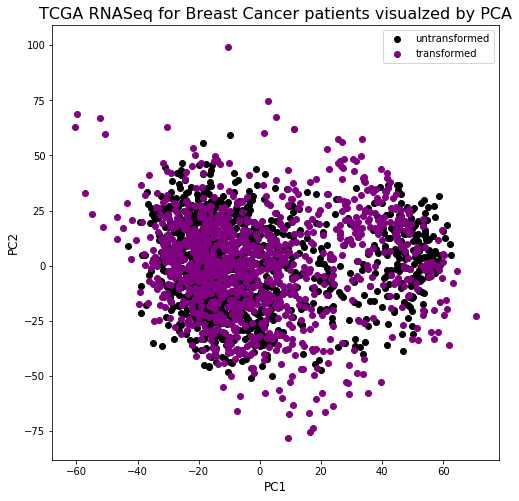

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('TCGA RNASeq for Breast Cancer patients visualzed by PCA', fontsize = 16)
ax.scatter(f_PCA_DF.PC1,f_PCA_DF.PC2,color="black")
ax.scatter(f_PCA_DF1.PC1,f_PCA_DF1.PC2,color="purple")
ax.legend(["untransformed","transformed"])

## Lets determine the optimum number of feature sets to begin with optimizing number of features

### First I'm going to change the number of features. These features are currently ranked in descending order of variances.
**Variances allow us to separate patients into different identifyable cohorts. High variance features will have good separation and detection capabilities to identify patient segments**

*We can see the number of features used did not visually affect the number of possibly identifyable clusters here*

In [80]:
def PCA_nR(f,nR):
    pca = PCA(n_components=2)
    f_PCA_DF=df(data=pca.fit_transform(f.iloc[1:nR,:].T),columns=['PC1','PC2'])
    return(f_PCA_DF)

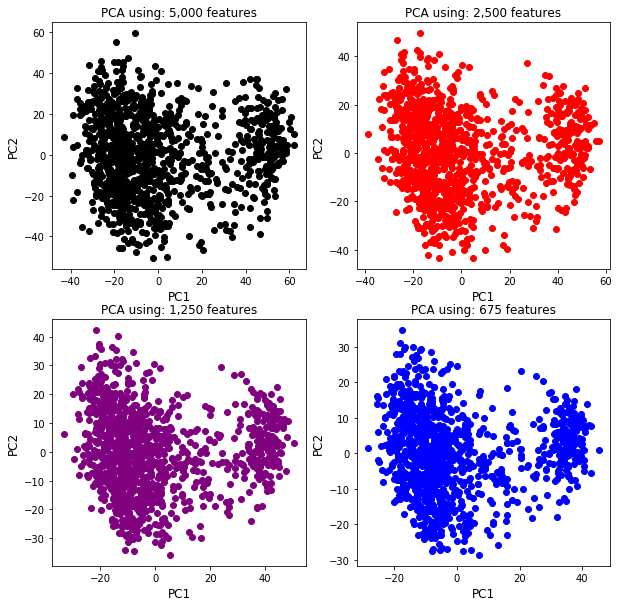

In [86]:
colss=['black','red','purple','blue']
nms=['5,000 features','2,500 features','1,250 features','675 features']
nR=[5000,2500,1250,675]
fig = plt.figure(figsize = (10,10))

for i in range(4):
    ax = fig.add_subplot(2,2,i+1) 
    ax.set_xlabel('PC1', fontsize = 12)
    ax.set_ylabel('PC2', fontsize = 12)
    ax.set_title('PCA using: '+nms[i], fontsize = 12)
    f_PCA_DF=PCA_nR(f,nR[i])
    ax.scatter(f_PCA_DF.PC1,f_PCA_DF.PC2,color=colss[i])

### Gasussian mixture model
*This statistical model assumes that the mixture is generated by a finite number of guassian distributions with unknown number of parameters*

*...coming soon*